In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('hospital_operations_5000.xls')

In [3]:
df.head()

,Day,Doctors_On_Duty,Nurses_On_Duty,Experience_Index,Patient_Arrivals,Bed_Occupancy_percent,Avg_Treatment_Time_min,Equipment_Downtime_hr,Emergency_Cases,Medicine_Cost_per_patient,Energy_kWh,Infection_Rate_percent,Recovery_Rate_percent,Patients_Discharged,Waiting_Time_min,Maintenance_Cost_INR,Demand_Index,Revenue_INR_lakh
0,1,29,45,1.114391,654,77.184721,36.366675,1.798449,70,2016.024604,5273.895862,3.905222,90.264494,663.706348,59.866132,44387.589576,1.108315,3310.180538
1,2,30,78,0.758744,673,88.448124,33.457323,3.217767,37,1740.439378,5243.575450,5.571472,86.150789,471.701269,71.468086,55742.138264,0.975379,2070.394669
2,3,22,46,1.299433,502,67.910988,33.614243,1.145333,46,2151.394549,5627.185351,2.942107,90.234029,616.904401,52.891060,39162.663168,1.072245,2976.627109
3,4,23,51,1.088360,545,82.542393,32.721161,1.852981,79,1717.605118,4840.660604,3.988322,89.644693,564.201096,62.281860,44823.845485,1.217718,3091.671009
4,5,24,70,1.140704,675,90.501527,35.670780,0.540110,22,1860.466150,5256.400404,5.306584,87.259219,728.945039,58.901161,34320.880274,1.154582,3787.321647


In [4]:
df.isnull().sum()

Day                          0
Doctors_On_Duty              0
Nurses_On_Duty               0
Experience_Index             0
Patient_Arrivals             0
Bed_Occupancy_percent        0
Avg_Treatment_Time_min       0
Equipment_Downtime_hr        0
Emergency_Cases              0
Medicine_Cost_per_patient    0
Energy_kWh                   0
Infection_Rate_percent       0
Recovery_Rate_percent        0
Patients_Discharged          0
Waiting_Time_min             0
Maintenance_Cost_INR         0
Demand_Index                 0
Revenue_INR_lakh             0
dtype: int64

In [6]:
# 1. What is the avg number of patients discharged per day? Is the process stable?
avg_discharge=df['Patients_Discharged'].mean()
avg_discharge

469.10480464091086

In [7]:
std_discharge=df['Patients_Discharged'].std()
std_discharge

139.42764577715963

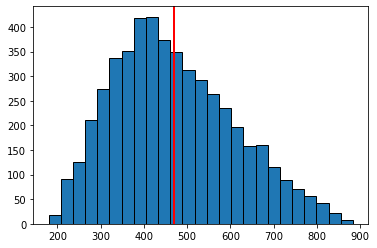

In [74]:
# 2. patient discharge normally distributed?
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(df['Patients_Discharged'], bins=25,edgecolor='Black')
plt.axvline(avg_discharge, color='red', linestyle='-', linewidth=2, label=f'Mean = {avg_discharge:.2f}')
plt.xlabel=['Patients_Discharged']
plt.ylabel=['Frequency']
plt.show()

In [75]:
# 3. Does equipment downtime significantly reduce patients discarged?

df[['Equipment_Downtime_hr', 'Patients_Discharged']].corr()

,Equipment_Downtime_hr,Patients_Discharged
Equipment_Downtime_hr,1.000000,-0.111353
Patients_Discharged,-0.111353,1.000000


In [45]:
# 4. Does higher staff experience improve throughput?
df[['Experience_Index', 'Patients_Discharged','Revenue_INR_lakh']].corr()

,Experience_Index,Patients_Discharged,Revenue_INR_lakh
Experience_Index,1.000000,0.720643,0.647767
Patients_Discharged,0.720643,1.000000,0.903220
Revenue_INR_lakh,0.647767,0.903220,1.000000


In [36]:
# 5. Does bed occupancy increase waiting time?
df[['Bed_Occupancy_percent', 'Waiting_Time_min']].corr()

,Bed_Occupancy_percent,Waiting_Time_min
Bed_Occupancy_percent,1.000000,0.688439
Waiting_Time_min,0.688439,1.000000


In [37]:
# 6. Are infection rates higher during high occupancy days?
df[['Infection_Rate_percent','Bed_Occupancy_percent']].corr()

,Infection_Rate_percent,Bed_Occupancy_percent
Infection_Rate_percent,1.000000,0.237705
Bed_Occupancy_percent,0.237705,1.000000


In [38]:
# 7. Does downtime increase maintenance cost?
df[['Equipment_Downtime_hr','Maintenance_Cost_INR']].corr()

,Equipment_Downtime_hr,Maintenance_Cost_INR
Equipment_Downtime_hr,1.0,1.0
Maintenance_Cost_INR,1.0,1.0


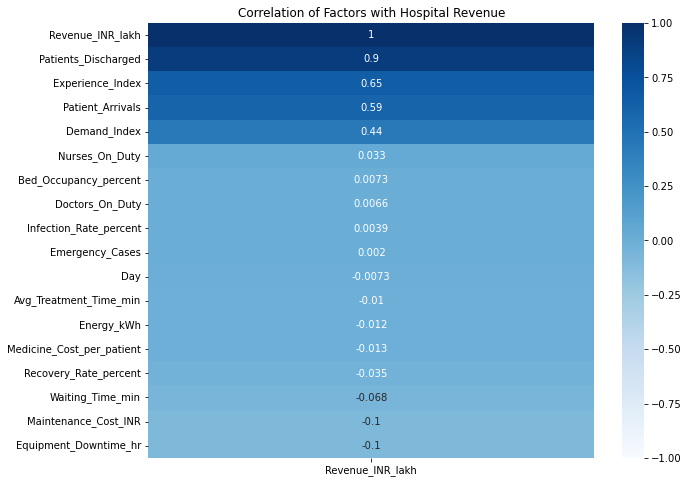

In [52]:
# 8. which factors most affect hospital revenue?
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()

# Plot correlation of all factors with Revenue
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix[['Revenue_INR_lakh']].sort_values(by='Revenue_INR_lakh', ascending=False),
            annot=True,cmap='Blues',vmin=-1, vmax=1)
plt.title('Correlation of Factors with Hospital Revenue')
plt.show()

Patients_Discharge affects most the hospital revenue as the correlation betweent them is 0.9 

In [57]:
# 9. Does longer treatment time reduce throughput?
df[['Avg_Treatment_Time_min','Patients_Discharged']].corr()

,Avg_Treatment_Time_min,Patients_Discharged
Avg_Treatment_Time_min,1.000000,-0.006227
Patients_Discharged,-0.006227,1.000000


In [58]:
# 10. what is the 95% confidence interval of recovery rate?
from scipy import stats
import numpy as np

data = df['Recovery_Rate_percent']
n = len(data)
mean = np.mean(data)
std = np.std(data, ddof=1)

# 95% CI using t-distribution
ci = stats.t.interval(alpha=0.95, df=n-1, loc=mean, scale=std/np.sqrt(n))
print(f"95% Confidence Interval: {ci}")


95% Confidence Interval: (89.20719056688657, 89.29779674999753)


In [61]:
# 11. What % of days have waiting time>60 minutes?
total_days = len(df)
days_60 = (df['Waiting_Time_min'] > 60).sum()
percent = (days_60 / total_days) * 100
print(f"Percentage of days with waiting time > 60 minutes: {percent:.2f}%")

Percentage of days with waiting time > 60 minutes: 60.62%


In [64]:
# 12. Are emergency cases associated with higher infection rates?
df[['Emergency_Cases', 'Infection_Rate_percent']].corr()

,Emergency_Cases,Infection_Rate_percent
Emergency_Cases,1.000000,0.007171
Infection_Rate_percent,0.007171,1.000000


The correlation of Emergency case with Infection rate is 0.007171.

In [66]:
# 13. What variable shows highest variablity?
variablity= df.std()
var_sort=variablity.sort_values(ascending=False)
print(var_sort)

Maintenance_Cost_INR         7807.038351
Day                          1443.520003
Revenue_INR_lakh              744.684972
Energy_kWh                    402.974759
Medicine_Cost_per_patient     150.616255
Patients_Discharged           139.427646
Patient_Arrivals              101.975434
Emergency_Cases                17.693056
Nurses_On_Duty                 14.746015
Bed_Occupancy_percent          11.497193
Waiting_Time_min                6.727330
Avg_Treatment_Time_min          5.080772
Doctors_On_Duty                 4.612664
Recovery_Rate_percent           1.634028
Infection_Rate_percent          1.031151
Equipment_Downtime_hr           0.975880
Experience_Index                0.201734
Demand_Index                    0.144920
dtype: float64


In [69]:
# 15. What conditions correspond to top 10% revenue days?
top_10_percent_threshold = df['Revenue_INR_lakh'].quantile(0.9)
top_revenue_days = df[df['Revenue_INR_lakh'] >= top_10_percent_threshold]
print(top_revenue_days.mean())

Day                           2510.046000
Doctors_On_Duty                 22.816000
Nurses_On_Duty                  64.910000
Experience_Index                 1.167494
Patient_Arrivals               631.702000
Bed_Occupancy_percent           79.845865
Avg_Treatment_Time_min          35.143193
Equipment_Downtime_hr            1.818421
Emergency_Cases                 50.266000
Medicine_Cost_per_patient     1795.872999
Energy_kWh                    5486.578856
Infection_Rate_percent           4.561273
Recovery_Rate_percent           89.158026
Patients_Discharged            700.061960
Waiting_Time_min                61.030449
Maintenance_Cost_INR         44547.364921
Demand_Index                     1.182440
Revenue_INR_lakh              3709.410903
dtype: float64


In [82]:
# 14. Predict number of patients discharged using regression?
# Target
y = df['Patients_Discharged']

# Features
X = df.drop(['Patients_Discharged', 'Day'], axis=1)  # Drop Day if you want, or keep for time trend


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R² score: {r2:.2f}")


MSE: 258.71
R² score: 0.99


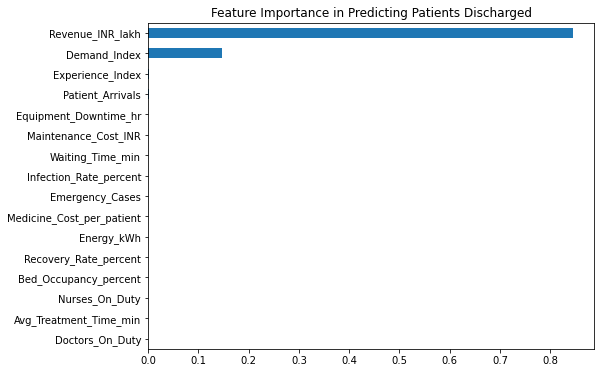

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance in Predicting Patients Discharged")
plt.show()